# Assignment 1

***Importing libraries***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import math

# Part 1 Binning degree distributions

### Part 1.1 Binning real numbers

- Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [2]:
mu = 2
sigma = 0.125
sampleSize = 5000

## Generating 5000 data points with the mu = 2 and sigma = 0.125
points = np.random.normal(mu, sigma, sampleSize)

- Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?

In [3]:
## Binning the randomly generated samples into 10 bins
numOfBins = 10
count, binEdges = np.histogram(points, bins=numOfBins)


***numpy histogram definition:***  The numpy histogram function computes the occurrences of the imput data (points) that within each bins. It returns two arrays as follows: 

* First Array: It consists of number of occurrences in each bin. The array length is 10 (ie. Number of bins)
* Second Array: It consists of bin width. For instance, the first value corresponds to the start of first bin and the second value corresponds to the end of first bin and start of second bin. The array   length is 11.

The length of the first array and the second array is not the same. 

- Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

***Explanation:*** Since the size of the counts array is 10 and the size of the binEdges array is 11, plotting this will be an issue due to the mis-match in the array length. This could be solved by removing the last value in the binEdges array which is the edge of the last bin.

In [4]:
## Removing the last value in the binEdges array
binEdges = binEdges[:-1]

(array([  14.,   86.,  420., 1220., 1623., 1152.,  409.,   70.,    5.]),
 array([1.53263284, 1.63844014, 1.74424744, 1.85005474, 1.95586204,
        2.06166934, 2.16747664, 2.27328394, 2.37909124, 2.48489854]),
 <a list of 9 Patch objects>)

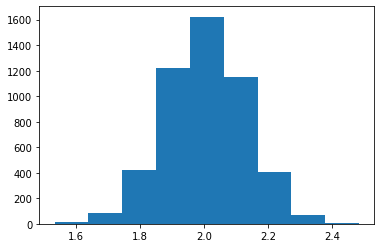

In [5]:
## Plotting the binned data 
plt.hist(points, bins=binEdges)

### Part 1.2 Binning Integers

- But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

In [6]:
lambdaa = 10
sampleSize = 5000

## Generating 5000 data points from poisson distribution with lambda = 10
poissonPoints = np.random.poisson(lambdaa, sampleSize)

## Finding the min value in the randomly generated points from poisson distribution 
minn = min(poissonPoints)

## Finding the max value in the randomly generated points from poisson distribution 
maxx = max(poissonPoints)

'The minimum value is {} and maximum value is {}'.format(minn,maxx)

'The minimum value is 0 and maximum value is 24'

- Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how numpy.histogram deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting numpy.histogram's bin parameter as bin = $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [7]:
## Specifying the bins in a vector v. Where the first bin contains the minimum values and the last bin contains the maximum values
v = list(range(minn,maxx+1))
print(v)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


It is correct to set the first entry to be equal to the min value of the points generateted randomly from the poisson distribution as it will ensure the least value is covered likewise it is correct to set the last entry to be equal to the max value as it will ensure the largest value is covered in the bin.

In [8]:
## Binning the randomly generated samples into 10 bins
counts, binWidths = np.histogram(poissonPoints,bins=v)

***Explanation:*** Since the size of the counts array is 21 and the size of the binWidths array is 22, plotting this will be an issue due to the mis-match in the array length. This could be solved by removing the last value in the binWidths array which is the edge of the last bin.***

- Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution

<BarContainer object of 24 artists>

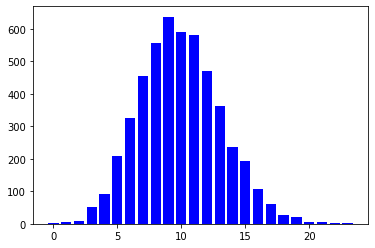

In [9]:
## Slicing out the last element in the binWidths. 
binWidths = binWidths[:-1]

## Plotting the randommly generated points from poisson distributions using the computed bins width
plt.bar(binWidths, counts, color="blue")

In [10]:
##Computing the sum over bins
binSum = sum(counts)

'The sum of the bin counts of the data is {}'.format(binSum)

'The sum of the bin counts of the data is 5000'

In this case, the binning-vector is definied by based on the min and max value from the poisson distribution. Thats how the binning vectors first and last element is related to the min and max from the poisson distribution.

### Part 1.3 Binning and plotting degree distributions

- Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that $N = 5000$, but how do you find $p$? Hint: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

In [11]:
N = 5000
lambdaa = 10

## Finding p
p = lambdaa/(N-1.0)

- Now, use networkx to create the graph and extract the degree distribution.

In [12]:
## Creating the graph
ER = nx.erdos_renyi_graph(N,p) 

- Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [13]:
degreeList = [degree for degree in dict(ER.degree).values()]
bin_vector  = [x for x in range(min(degreeList), max(degreeList))]
counts, bin_edges = np.histogram(degreeList, bins=bin_vector)

<BarContainer object of 22 artists>

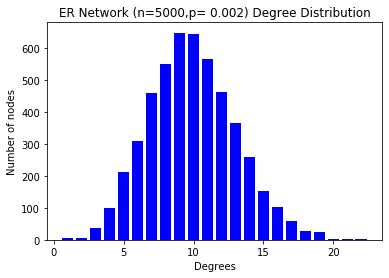

In [14]:
## Plotting the points using the computed degreeList and bin_vector
plt.ylabel("Number of nodes")
plt.xlabel("Degrees")
plt.title(f"ER Network (n={N},p={p: .3f}) Degree Distribution")
plt.bar(bin_edges[:-1], counts, color="blue")

# Part 2: Random networks and plotting in networkx

### Part 2.1 In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = $10^{–3}$.

In [15]:
## Parameters
##  ----------
##  N : int The number of nodes
##  p : float The probability of rewiring each edge
N = 3000
p = 0.001

gh1 = nx.erdos_renyi_graph(N,p)

- What is the expected number of links, 〈L〉?

The formula to get 〈L〉 is:
\begin{equation*}
〈L〉 = \sum_{L=0}^{\frac{N(N-1)}{2}} L p_L = p \frac{N(N-1)}{2}
\end{equation*}

In [16]:
L = p*((N*(N-1)/2))
print("〈L〉 = " + str(L))

〈L〉 = 4498.5


- In which regime is the network?

It's necessary to get the average degree of the network to check its regime:
\begin{equation*}
〈k〉 = \frac{2〈L〉}{N} = p(N-1)
\end{equation*}

In [17]:
k = p*(N-1)
print("〈k〉 = " + str(k))

〈k〉 = 2.999


***Explanation:*** The network is in the Supercritical Regime because 1 <〈k〉<ln(N), where ln(N)=8.

- Calculate the probability $p_{C}$ so that the network is at the critical point

The Critical Point separates the regime where there is not yet a giant component from the regime where there is one. For this regime 〈k〉=1 and p could be calculated easily with the formula mentioned in the previous answer: p=1/(N-1)

In [18]:
p_c = 1/(N-1)
print("p_c = " + str(p_c))

p_c = 0.00033344448149383126


- Given the linking probability p = $10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

To have a network with only one giant component it has to reach the Connected Regime, where 〈k〉>ln(N) and p>ln(N)/N. The ecuation p\*N>ln(N) is resolved for $N^{cr}$>9000 aproximately. The next plot represents both functions and their cut point:

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


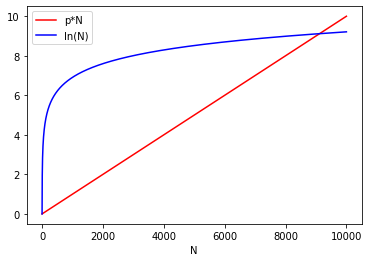

In [19]:
x = list(range(10000)) # x axis
lg_func = np.log(x) # function 1: ln(N)
line = [p*i for i in x] # function 2: p*N

## Ploting both functions
plt.plot(x, line, 'r-', label='p*N') 
plt.plot(x, lg_func, 'b-', label='ln(N)')         
plt.xlabel("N") 
plt.legend()
plt.show()

- For the network of the last question, calculate the average degree 〈$k^{cr}$〉 and the average distance between two randomly chosen nodes 〈d〉.

In [20]:
N_cr = 9200 # Just to be sure that Ncr > 9000
gh1_cr = nx.erdos_renyi_graph(N_cr,p)

k_cr = p*(N_cr-1)
print("〈k_cr〉 = " + str(k_cr))

〈k_cr〉 = 9.199


In [21]:
d = nx.average_shortest_path_length(gh1_cr)
print("<d>="+str(d))

<d>=4.365586004149789


- Calculate the degree distribution $p_{k}$ of this network (approximate with a Poisson degree distribution).

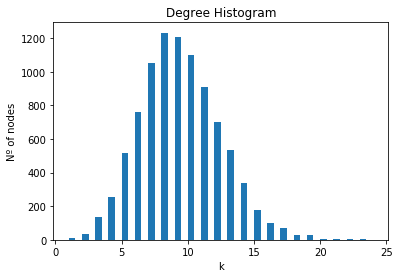

In [22]:
## Loop to save the degree of each node
degree_sequence = []
for n in range(1,N_cr):
    degree_sequence.append(gh1_cr.degree[n])
    
## Plot histogram
b = N_cr//200
plt.hist(degree_sequence, bins=b)
plt.title('Degree Histogram')
plt.xlabel('k')
plt.ylabel('Nº of nodes')
plt.show()

Plotting the degree's histogram of the graph is easy to see that the degree distribution function is aprox. a Poisson degree distribution with mean 〈$k^{cr}$〉=9.199. Also it has more nodes with higher degrees than ones with lower degrees.

### Part 2.2 Paths. Plot a random network with 200 nodes and an average degree of 1.5.

The probability of a link between two random nodes of the network can be obtained with this formula (applycable for random networks):
\begin{equation*}
p = \frac{〈k〉}{(N-1)})
\end{equation*}

p = 0.007537688442211055


C:\Users\carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


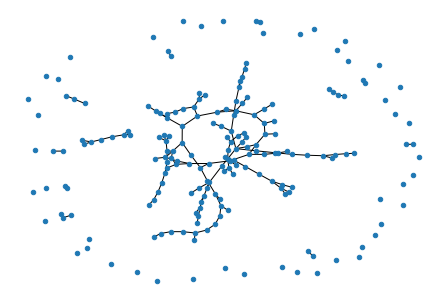

In [23]:
## Parameters
##  ----------
##  n : int The number of nodes
##  k : float The average degree
##  p : float The probability of rewiring each edge
N = 200
k = 1.5
p = k/(N-1)
print("p = "+str(p))


gh2 = nx.gnp_random_graph(N,p)
nx.draw(gh2,node_size=20)

- Extract the Giant Connected Component, GCC.

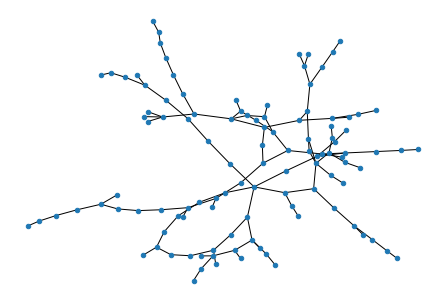

In [24]:
ggc = max(nx.connected_component_subgraphs(gh2), key=len)
nx.draw(ggc,node_size=20)

- Choose a node at random from the GCC.

In [53]:
node1 = random.choice(list(ggc.nodes))
print("Random node "+str(node1)+" selected.")

Random node 131 selected.


- Find all nodes that are precisely 2 steps away from that node.

In [26]:
node_2steps = []
neig_node1 = list(ggc.neighbors(node1))
for n in neig_node1:
    node_2steps.extend(list(ggc.neighbors(n)))
node_2steps = list(set(node_2steps))
node_2steps.remove(node1)
node_2steps = list(set(node_2steps) - set(neig_node1))
print("Nodes "+str(node_2steps)+" are 2 steps away from node "+str(node1))

Nodes [104, 121, 98] are 2 steps away from node 86


- Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2").

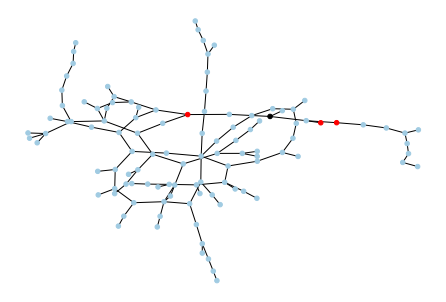

In [27]:
node_color = []
for n in list(ggc.nodes):
    if n == node1:
        node_color.append("#000000")
    elif n in node_2steps:
        node_color.append("#ff0000")
    else:
        node_color.append("#A0CBE2")
nx.draw(ggc,with_labels=False, node_size=20, node_color=node_color)

# Part 3: Watts-Strogatz Networks

- First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,and1. Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.

In [28]:
## Generating 3 wattts and strogatz graph with 500 nodes in each graph

## Parameters
##  ----------
##  n : int The number of nodes
##  k : int Each node is joined with its ``k`` nearest neighbors in a ring topology.
##  p : float The probability of rewiring each edge

##  nx.watts_strogatz_graph(n,k,p)

nodeCount = 500
avgDegree_k = 4

graph1 = nx.watts_strogatz_graph(nodeCount,avgDegree_k,0)
graph2 = nx.watts_strogatz_graph(nodeCount,avgDegree_k,0.1)
graph3 = nx.watts_strogatz_graph(nodeCount,avgDegree_k,1)

In [29]:
## Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.

## Calculate the average shortest path length ⟨d⟩ for Graph 1
graph1_avg_shortest_path = nx.average_shortest_path_length(graph1)

## Calculate the average shortest path length ⟨d⟩ for Graph 2
graph2_avg_shortest_path = nx.average_shortest_path_length(graph2)

## Calculate the average shortest path length ⟨d⟩ for Graph 3
graph3_avg_shortest_path = nx.average_shortest_path_length(graph3)

In [30]:
'The average shortest path for graph 1 is {}'.format(graph1_avg_shortest_path)

'The average shortest path for graph 1 is 62.875751503006015'

In [31]:
'The average shortest path for graph 2 is {}'.format(graph2_avg_shortest_path)

'The average shortest path for graph 2 is 7.2946693386773545'

In [32]:
'The average shortest path for graph 3 is {}'.format(graph3_avg_shortest_path)

'The average shortest path for graph 3 is 4.736801603206413'

***Conclusion:***  When p=1, then all the links will be randomly re-wired so that the network will begin to resemble a Random Network. As a consequence of this the average shortest path between any two nodes in the graph will be small.

- Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [33]:
nodeCount = 500
avg_degree_k = 4
p_values = [0,0.01,0.03,0.05,0.1,0.2]
numOfNetworks = 50

## Initializing empty array of dimension 50 x 6 to store the shortest path. 
avg_shortest_path_length = np.zeros((50, 6))

## Generating 50 Networks for each p value
for i, p in enumerate(p_values):
    
    count = 0
    
    while(count < numOfNetworks):
        
        ## Generating a strogatz graph
        graph = nx.watts_strogatz_graph(nodeCount,avgDegree_k,p)
    
        ## Calculate the average shortest path length ⟨d⟩ for Graph
        graph_avg_shortest_path = nx.average_shortest_path_length(graph)
        
        ## Storing it in the array
        avg_shortest_path_length[count,i] = graph_avg_shortest_path
        
        count += 1
        


In [34]:
## Calculate the average of ⟨d⟩ for each p value
avg_shortestPath = np.mean(avg_shortest_path_length, axis = 0)

## Calculating the standard deviation

stdev = np.std(avg_shortest_path_length, axis = 0)

- Plot of average $\langle d \rangle$ as a function of rewiring probability $p$

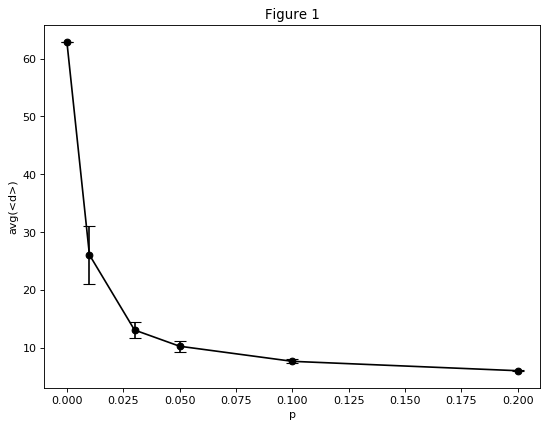

In [35]:
## Plotting the average <d> as a function of rewiring probability p
plt.figure(figsize=(8, 6), dpi= 80)
plt.errorbar(p_values, avg_shortestPath, yerr = stdev, fmt = '-ko',capsize=5)
plt.xlabel('p')
plt.ylabel('avg(<d>)')
plt.title('Figure 1')
plt.show()

# Part 4: The Barabasi-Albert Model

- Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [36]:
## Defining the function to generate graph
def barabasi_model(nodes):
    # create a graph with one link
    graph = nx.Graph()
    graph.add_nodes_from([0,1])
    graph.add_edge(0 ,1)
    for node in range(2,nodes):
        nodes = np.array(list(graph.edges)).flatten()
        selected = np.random.choice(nodes)
        graph.add_node(node)
        graph.add_edge(node, selected)
    
    return graph

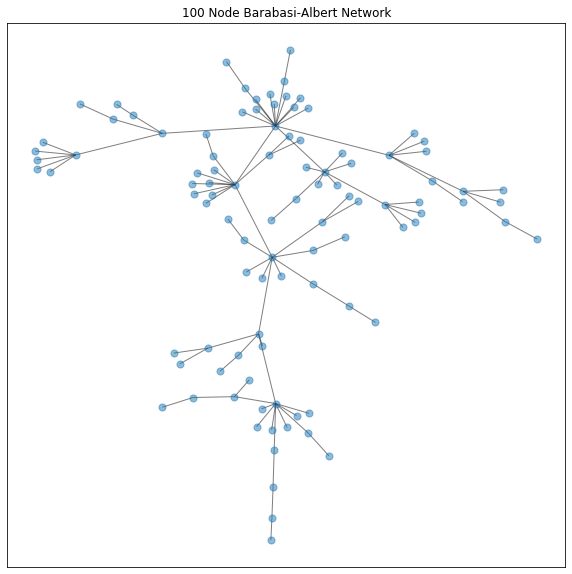

In [37]:
#create a 100 node BA network
BA = barabasi_model(100)
plt.figure(figsize=(10,10))
plt.title("100 Node Barabasi-Albert Network")
nx.draw_networkx(BA, node_size=50, with_labels=False, alpha=0.5)

- Now create a 5000 node network

In [38]:
BA_5000 = barabasi_model(5000)

- Finding the maximum and minimum degree

In [39]:
max_degree = max(dict(BA_5000.degree).values())
min_degree = min(dict(BA_5000.degree).values())

print('Max_degree = ', max_degree)
print('Min_degree = ', min_degree)

Max_degree =  114
Min_degree =  1


- Bin the Degree Distribution

In [40]:
degreeList = [degree for degree in dict(BA_5000.degree).values()]
bin_vector  = [x for x in range(min(degreeList), max(degreeList))]
counts, bin_edges = np.histogram(degreeList, bins=bin_vector)

- Plot the Distribution

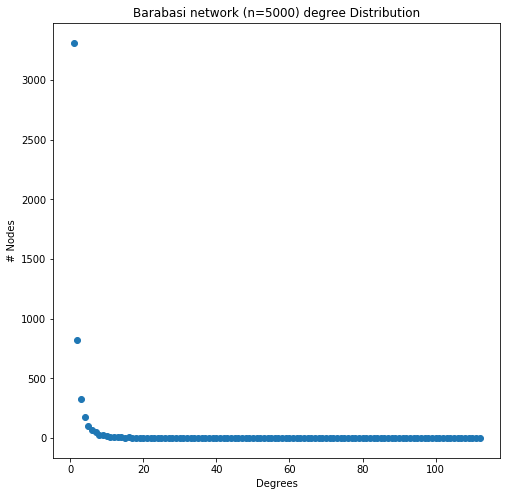

In [41]:
plt.figure(figsize=(8,8))
plt.ylabel('# Nodes')
plt.xlabel('Degrees')
plt.title("Barabasi network (n=5000) degree Distribution")
plt.scatter(bin_edges[:-1], counts)
plt.show()

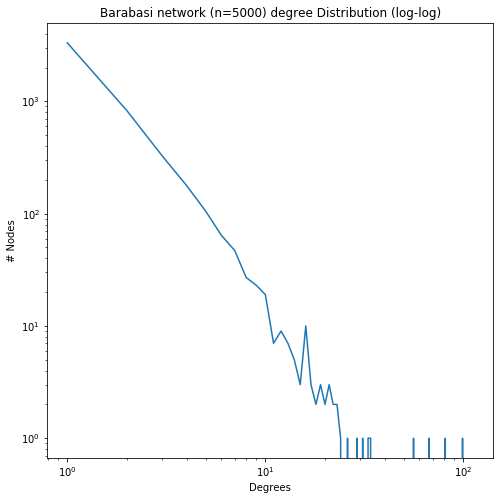

In [42]:
plt.figure(figsize=(8,8))

plt.ylabel('# Nodes')
plt.xlabel('Degrees')
plt.title("Barabasi network (n=5000) degree Distribution (log-log)")
plt.loglog(bin_edges[:-1], counts)
plt.show()

# Part 5: Power Laws and Friendship Paradox

Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

Defining a function to perform the following actions: 

- Pick a node i at random (e.g. use random.choice). Find its degree.
- find n's neighbours and their average degree
- Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
- Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [43]:
def friendship_paradox(graph):
    # initialize a list of boolean True if neigbours degree is larger False if not
    count = []
    for i in range(1000):
        # pick a node n at random and find its degree
        random_node = np.random.choice(list(graph.nodes))
        random_node_degree = graph.degree[random_node]
        #find n's neighbours and their average degree
        neighbours = list(graph[random_node])
        neighbours_avg_degree = np.mean([graph.degree[node] for node in neighbours])
        #check if neighbours avergae degree is bigger that n's and append it to a list
        count.append(random_node_degree < neighbours_avg_degree)
    return f"Neighbours avg Degree was larger {sum(count)} out of {len(count)} times"

- Check our BA Network for Friendship Paradox

In [44]:
friendship_paradox(BA_5000)

'Neighbours avg Degree was larger 841 out of 1000 times'

- Finally we'll build a network of the same size and degree, using the growth mechanism without the preferential attachment.

In [45]:
def growth_network(nodes):
    """Construct a graph by adding a node at random with propability 
        inverse to the number of nodes"""
    graph = nx.Graph()
    for node in range(5000):
        if nx.is_empty(graph):
            graph.add_nodes_from([1,2])
            graph.add_edge(1 ,2)
        else:
            graph.add_node(node)
            for n in list(graph.nodes):
                """ make add an edge at random, by attaching the new node 
                    to any other node with a propability p = 1/( number of nodes +1)
                """
                if np.random.rand() < 1/(node+1):
                    graph.add_edge(node, n)
        
    return graph

In [46]:
random_net = growth_network(5000)

To build a network with the growh mechanism but without the preferential attachment, each time we add a node to the network, it connects to another node at random, with a propability of $ p = \frac{1}{N+1} $ where N is the number of nodes.

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

-  Check the degree distribution

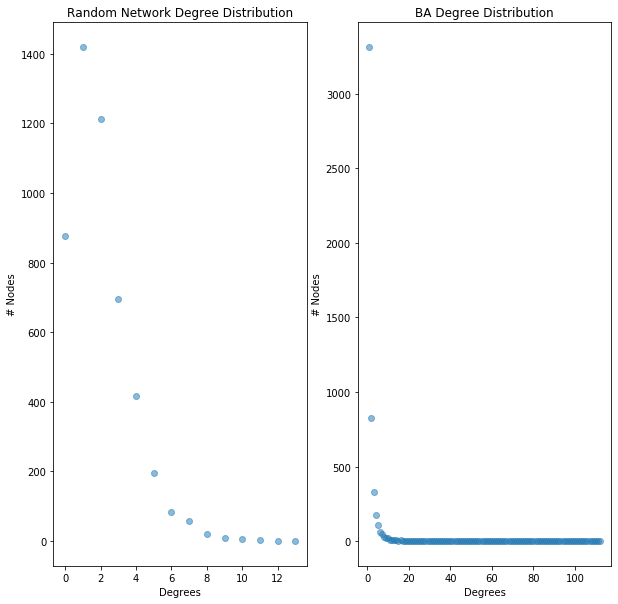

In [47]:
degree_list = [degree for n, degree in random_net.degree]
bin_vector = [x for x in range(min(degree_list), max(degree_list))]
hist, bin_edges = np.histogram(degree_list, bins=bin_vector)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('# Nodes')
ax1.set_xlabel('Degrees')
ax1.set_title('Random Network Degree Distribution')
ax1.scatter(bin_edges[:-1], hist, alpha=0.5)


#fig = plt.figure()
degree_list = [degree for n, degree in BA_5000.degree]
bin_vector = [x for x in range(min(degree_list), max(degree_list))]
hist, bin_edges = np.histogram(degree_list, bins=bin_vector)
ax2 = fig.add_subplot(122)
ax2.set_ylabel('# Nodes')
ax2.set_xlabel('Degrees')
ax2.set_title("BA Degree Distribution")
ax2.scatter(bin_edges[:-1], hist, alpha=0.5)


plt.show()

We observe that the random network follows a Poisson Distribution while the Barabasi-Albert Network follows a Power Law Distribution. 

-  Find the Maximum and Minimum Degrees

In [48]:
print(f"ER Max Degree: {max(dict(random_net.degree).values())} ER Min Degree {min(dict(ER.degree).values())}")
print(f"BA Max Degree: {max(dict(BA_5000.degree).values())} ER Min Degree {min(dict(BA_5000.degree).values())}")

ER Max Degree: 15 ER Min Degree 1
BA Max Degree: 114 ER Min Degree 1


We can see that in the BA network there exist nodes with much larger degree ( >\*10) than in the random network.

- Compare the average degree

In [49]:
avg_degree_BA = sum([d for n, d in BA_5000.degree()])/len(BA_5000.degree())
avg_degree_random_net = sum([d for n, d in random_net.degree()])/len(random_net.degree())

print(f"Random Net Average Degree: {avg_degree_BA}")
print(f"BA Average Degree: {avg_degree_random_net}")

Random Net Average Degree: 1.9996
BA Average Degree: 1.9683936787357472


- Study the Number of Connected Components

In [50]:
ER_components = list(nx.connected_components(random_net))
BA_components = list(nx.connected_components(BA_5000))
print("Random Net components: ", len(ER_components))
print("BA components: ",len(BA_components))

Random Net components:  1060
BA components:  1


We observe that in the Barabasi-Albert Network there is only one giant component, whereas in the Random Network there are multiple small components.

- Also we could test for the friendship paradox in both networks

In [51]:
friendship_paradox(BA_5000)

'Neighbours avg Degree was larger 848 out of 1000 times'

In [52]:
friendship_paradox(random_net)

C:\Users\carlo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\carlo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'Neighbours avg Degree was larger 527 out of 1000 times'

We can see that the friendship paradox does not occur in the random network, which is to be expected since the friendship paradox occurs due to the preferential attachment factor.